# Decision Tree

Dataset: NOAA Reef Check Bleaching Data from Kaggle

Link: https://www.kaggle.com/datasets/oasisdata/noaa-reef-check-coral-bleaching-data

The original dataset is used.

In [86]:
# Imported necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import warnings
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [87]:
# Accessing the dataset
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/NOAA_ReefCheck/NOAA_int.csv'
df = pd.read_csv(url)
df.head()

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,0,Atlantic,2005,4.0,1,3,2,0,0,3,0,0
1,0,Red Sea,2004,6.0,0,3,1,0,0,1,0,0
2,0,Pacific,1998,3.0,0,1,0,0,0,0,1,0
3,0,Pacific,1998,10.0,0,1,0,0,0,0,1,0
4,0,Atlantic,1997,10.0,0,3,0,0,0,3,2,0


In [88]:
# Splitting the dataset into features and target variable
feature_cols=['Storms','HumanImpact', 'Siltation','Dynamite','Poison', 'Sewage', 'Industrial','Commercial']
X = df[feature_cols] # Features
y = df['Bleaching'] # Target variable

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Decision Tree using Gini Index

In [90]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [91]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9732991953182151


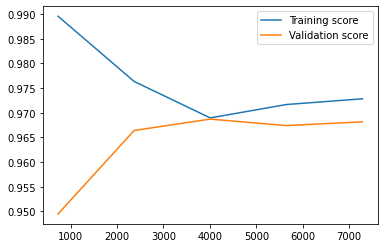

In [92]:
# Generate learning curves for the model
train_sizes, train_scores, val_scores = learning_curve(clf, X, y)

# Plot the learning curves
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.legend(loc='best')
plt.show()

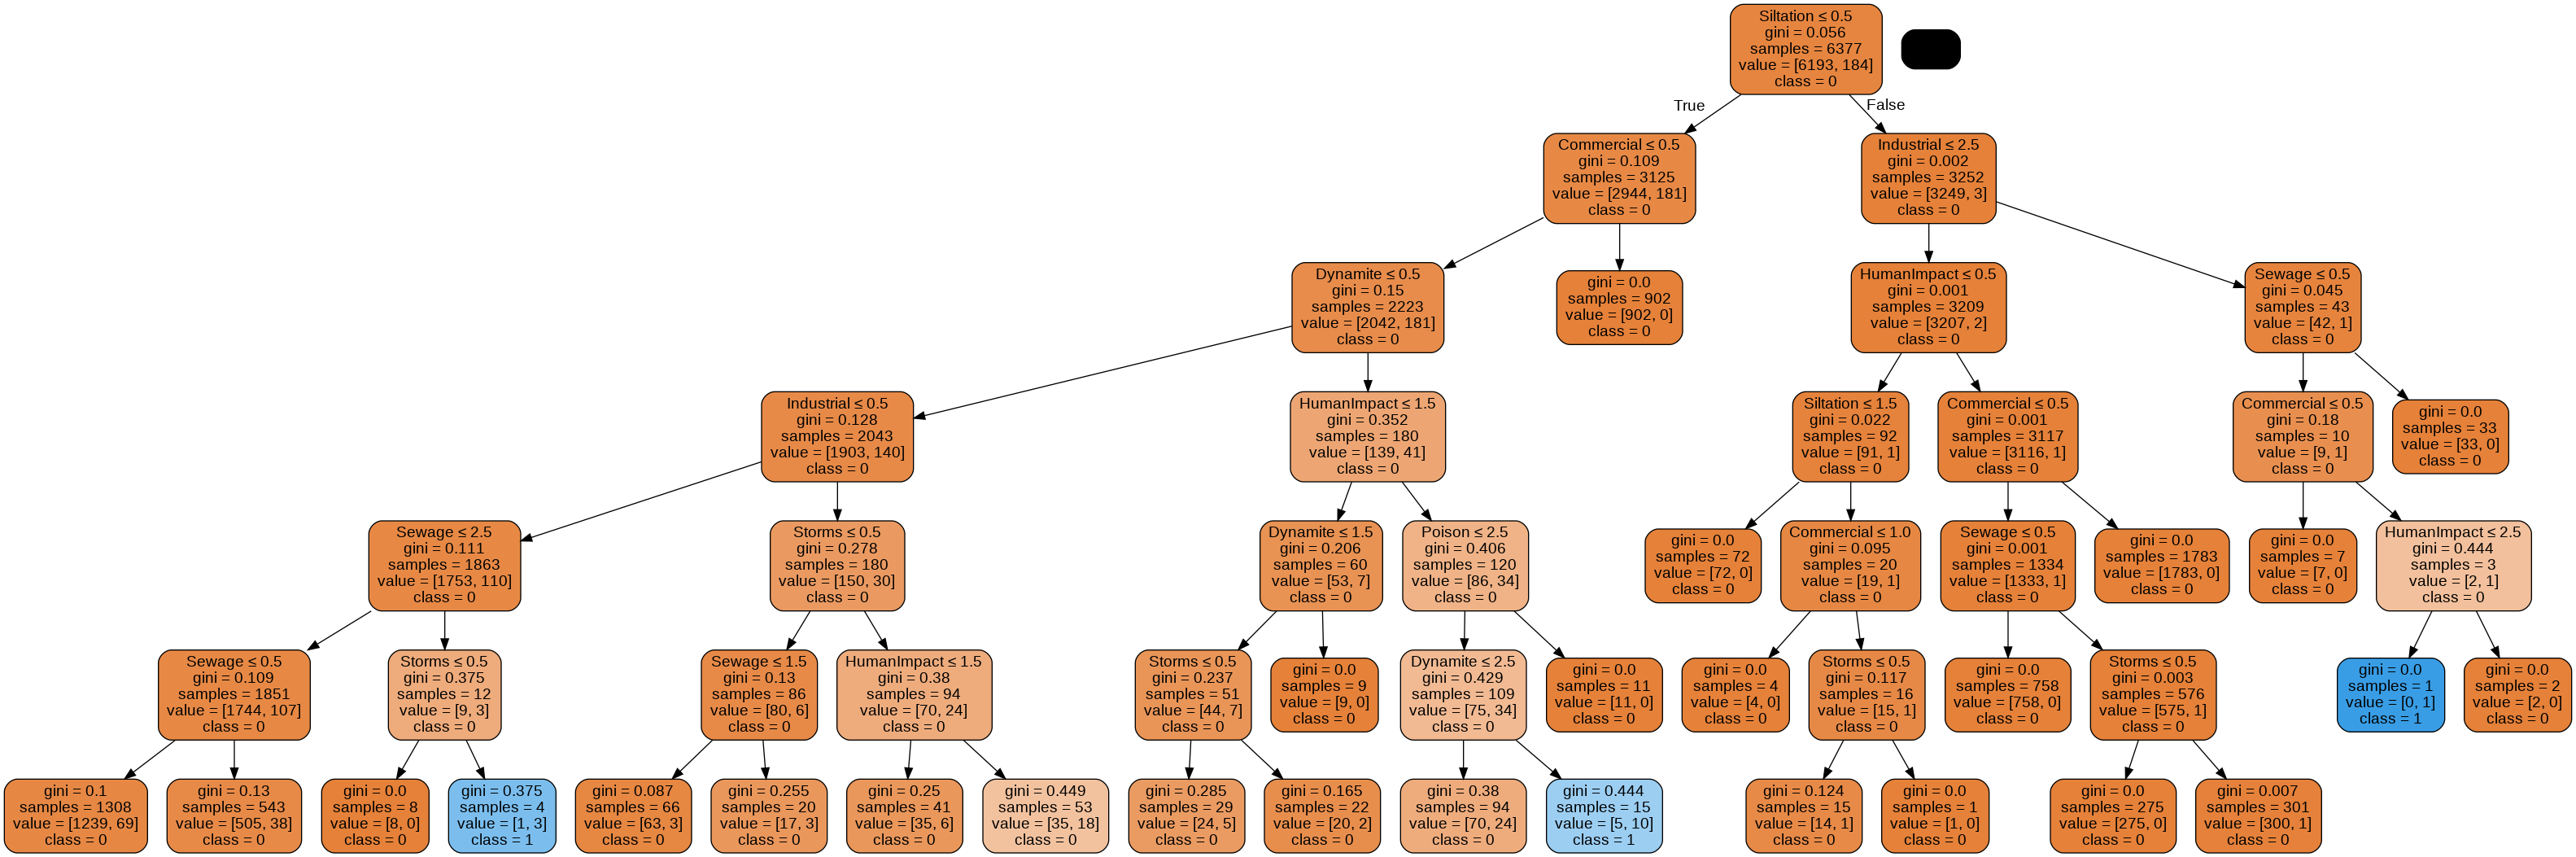

In [93]:
# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching_probability.png')
Image(graph.create_png())

In [94]:
print(classification_report(y_pred, y_test, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2726
           1       0.04      0.38      0.08         8

    accuracy                           0.97      2734
   macro avg       0.52      0.68      0.53      2734
weighted avg       1.00      0.97      0.98      2734



# Decision Tree with Entropy (Information Gain)

In [112]:
# Create Decision Tree classifer object
entropymodel = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
entropymodel = entropymodel.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = entropymodel.predict(X_test)

In [113]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9732991953182151


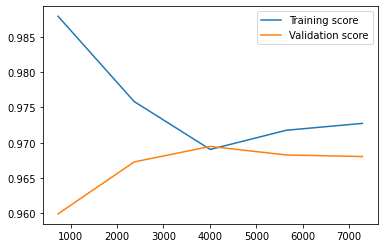

In [114]:
# Generate learning curves for the model
train_sizes, train_scores, val_scores = learning_curve(entropymodel, X, y)

# Plot the learning curves
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.legend(loc='best')
plt.show()

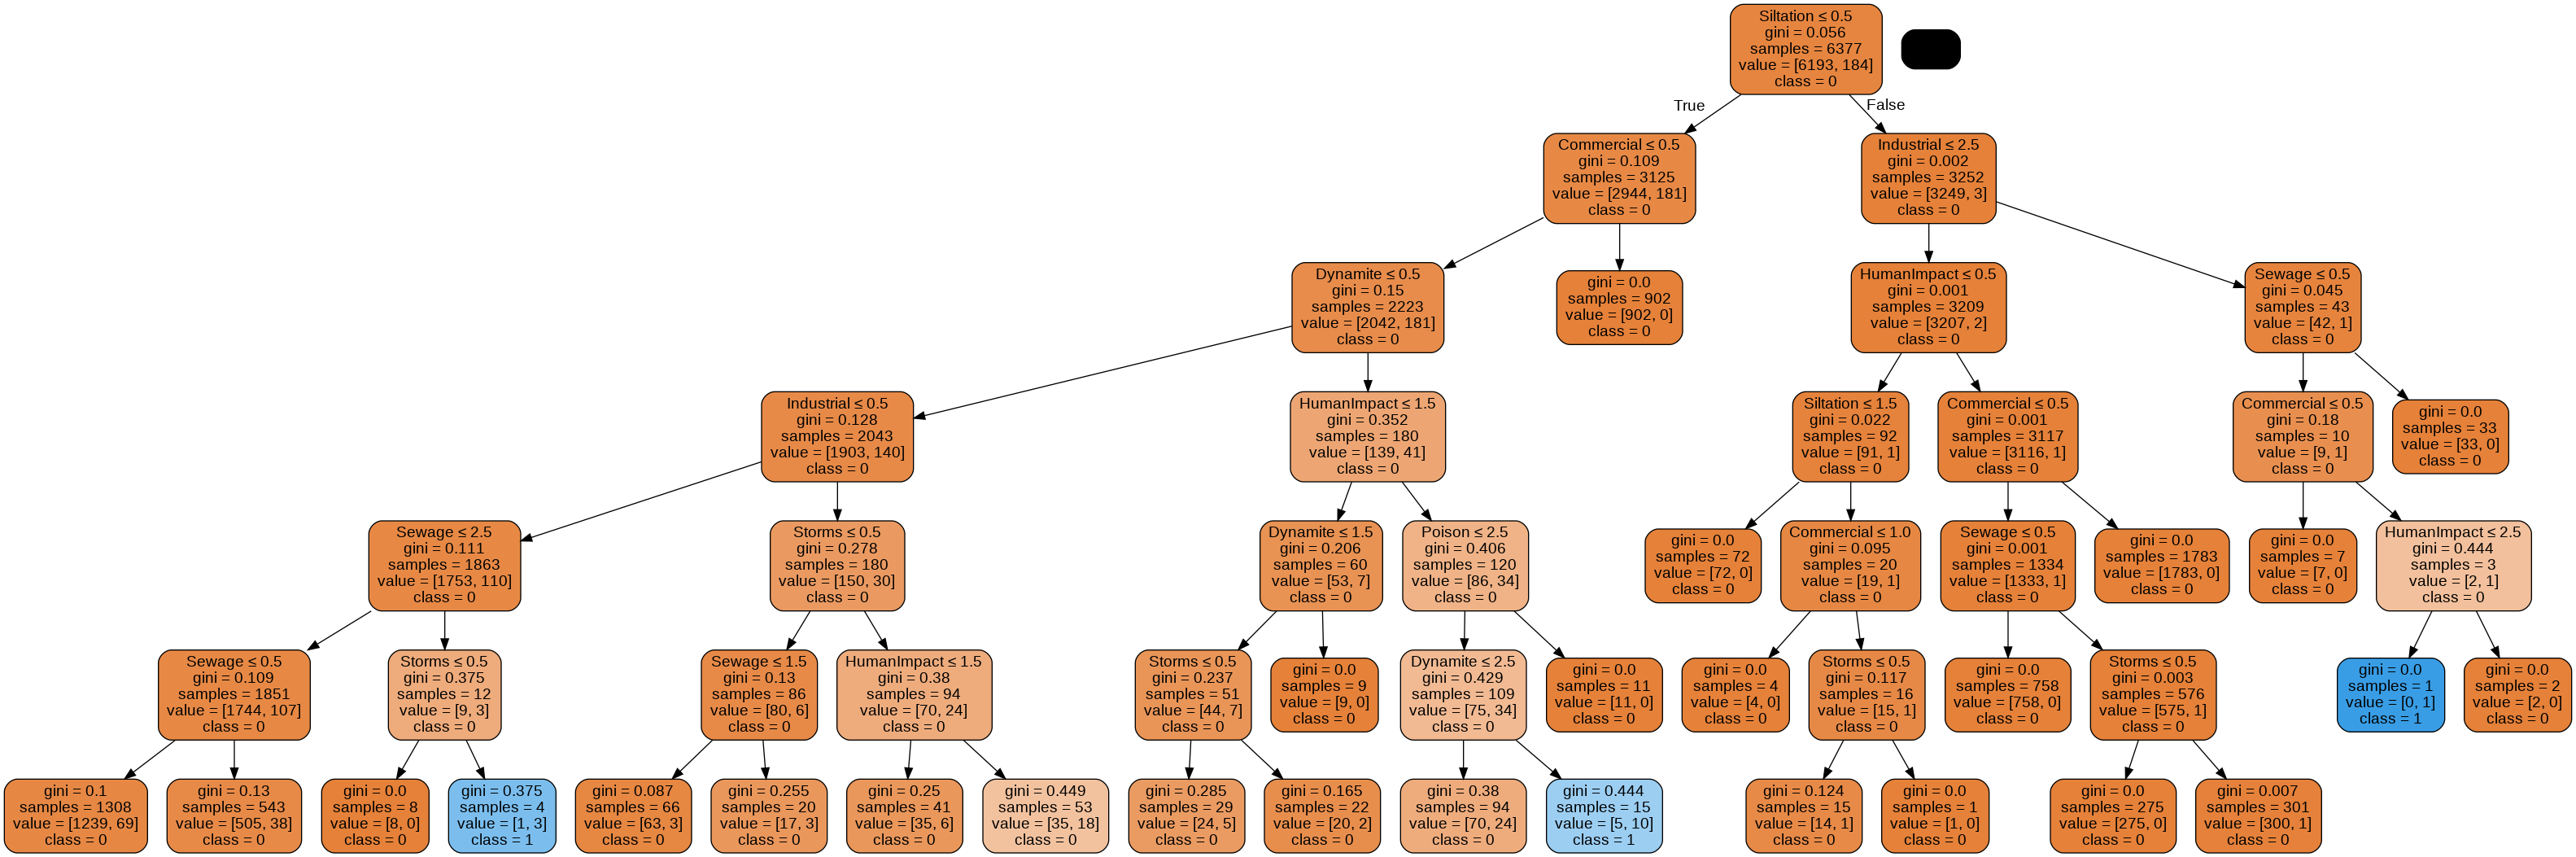

In [115]:
# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching_probability.png')
Image(graph.create_png())

In [116]:
print(classification_report(y_pred, y_test, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2728
           1       0.03      0.33      0.05         6

    accuracy                           0.97      2734
   macro avg       0.51      0.65      0.52      2734
weighted avg       1.00      0.97      0.98      2734

